# Thermal resistance calculation for a liquid cooling with minichannel

This calculation is based on a similar example 11.7 pag.739 used in book 

Title               : Fundamentals of Heat and Mass Transfer

Author(s)           : Theodore L. Bergman & Frank P. Incropera & Adrienne S. Lavine [Bergman, Theodore L. & Incropera, Frank P. & Lavine, Adrienne S.]

Publisher           : John Wiley & Sons

Identifiers         : isbn:9780470501979, google:vvyIoXEywMoC

ISBN                : 9780470501979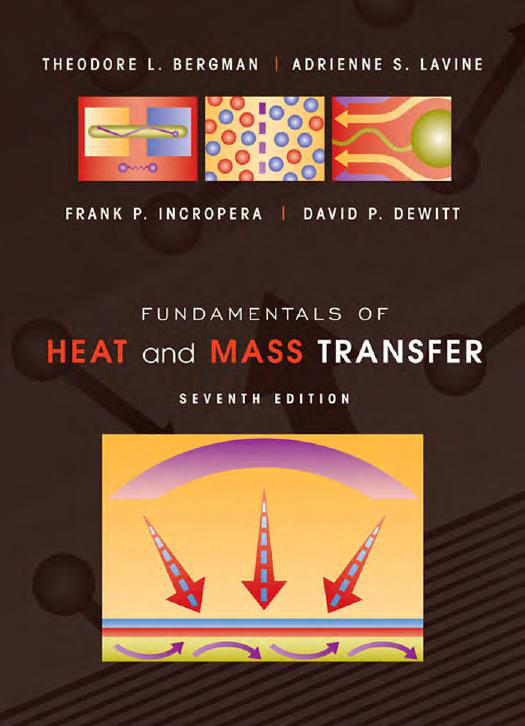


### Assumptions:
1. Steady-state conditions.
2. Adiabatic tips on heat sink fins.
3. Adiabatic heat sink sides, front and back surfaces.
4. Isothermal bottom surface temperature Th.
5. Constant properties.
6. Negligible axial conduction in the heat sink.

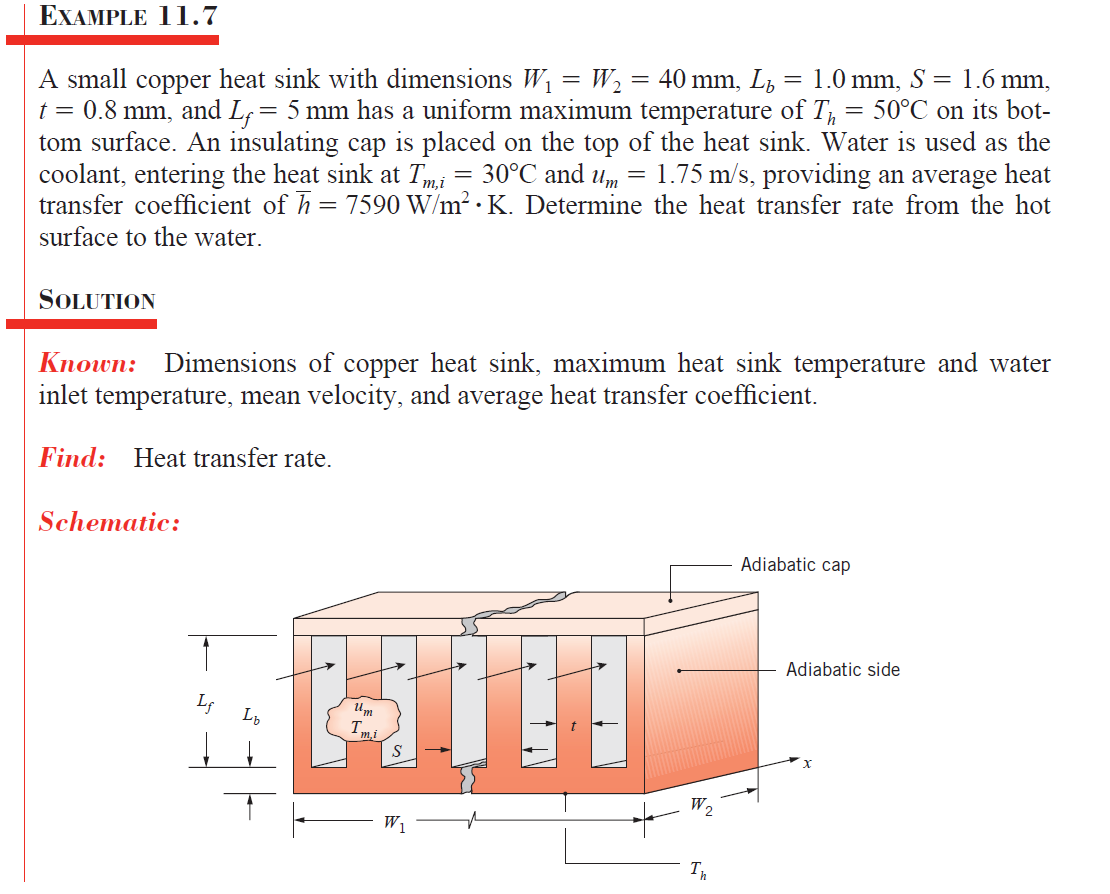

In [65]:
clear all
close all
clc

format shortEng

In [66]:
% Material Properties: Table A.1, 
kCu=401; %[W/m/K]. 
% Table A.6, 
rho_water=993; %[kg/m3] 
cp=4178; %[J/kg/K]

## Thermal resistance module to fluid
The thermal stack is composed by 3 different resistances:
1. base plate resistance
2. thermal resistance of fin to fluid
3. thermal resistance of fin not in fluid

The SiC module we are planning to use is CAS300M12BM2 https://www.wolfspeed.com/downloads/dl/file/id/183/product/101/cas300m12bm2.pdf.

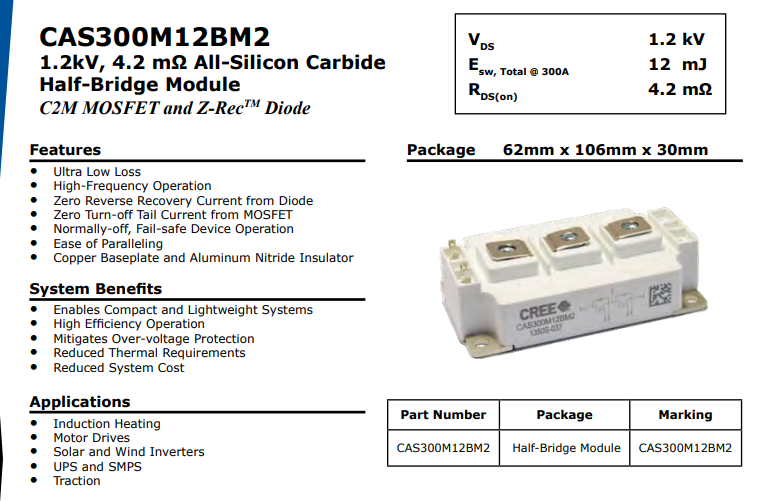

In [67]:
% power module dimensions
W1=62e-3; W2=106e-3;
A_module=W1*W2
RthJCM = 0.075;
RthJCD = 0.076;

A_module =     6.5720e-003


In [68]:
% water proprieties
h_avg = 4000; %[W/m2/K]
u_m = 1.75;  %[m/s]
Th=50 %[C] temperature of heated side
Tci=30  %[C] coolant tempererature

Th =    50.0000e+000
Tci =    30.0000e+000


Based on the Table reported by https://www.schweizer-fn.de/waerme/waermeuebergang/waerme_uebergang.php#kennzahl_formeln

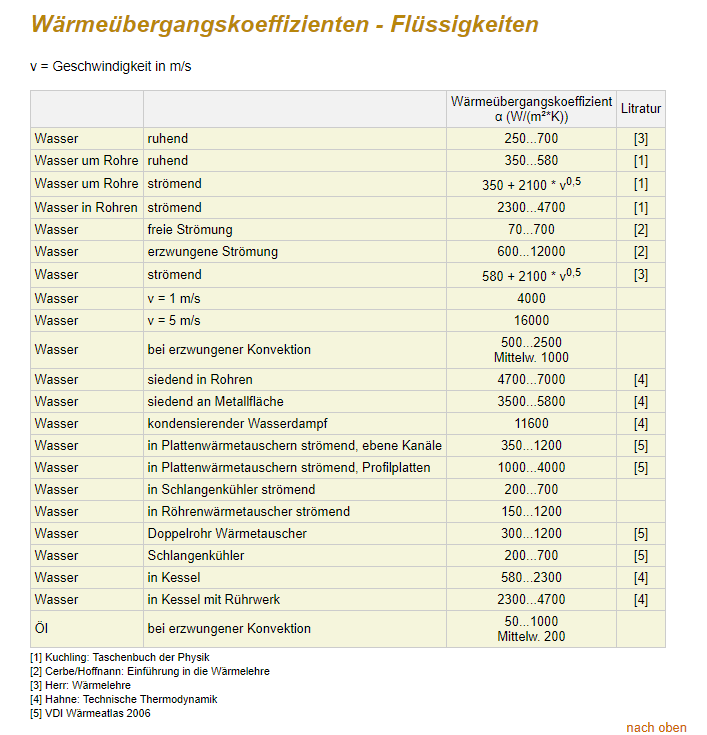


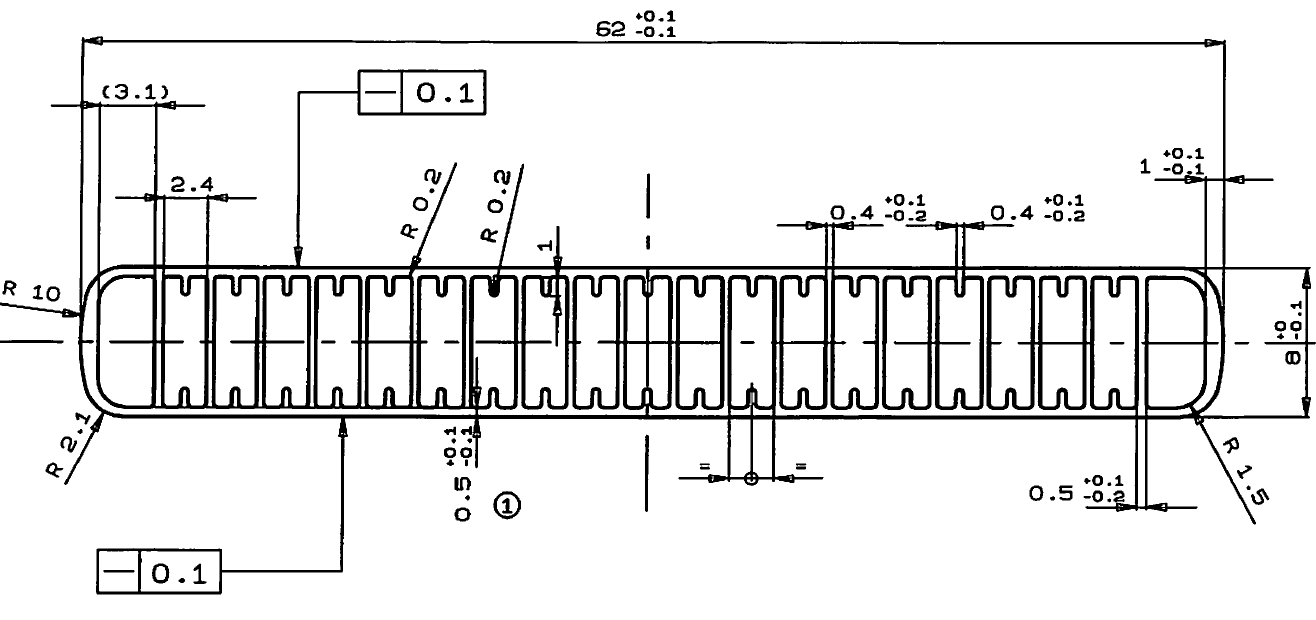

In [69]:
% minichannel 
t_base=.5e-3
t_fin=0.4e-3
h_ch=7e-3; %channel height
w_ch=2.4e-3; %single channel width
n_ch=19; %number of channel
p_ch=n_ch*2*(w_ch+h_ch) %[m] channel perifery

t_base =   500.0000e-006
t_fin =   400.0000e-006
p_ch =   357.2000e-003


In [70]:
mc=n_ch*rho_water*u_m*(w_ch*h_ch) %[kg*m/s] mass flow rate 
Cmin=mc*cp %[W/K] minimum heat capacity rate

mc =   554.6898e-003
Cmin =     2.3175e+003


The parallel resistances in the thermal circuit represent the fins and unfinned portion of the base. The combination of these two resistances is the overall thermal resistance of the fin array, as given by Equation 3.108 with Equation 11.3:

In [71]:
mLf=sqrt(2*h_avg/kCu/t_fin)*h_ch
eta_fin=tanh(mLf)/mLf

mLf =     1.5633e+000
eta_fin =   585.9117e-003


In [72]:
A_fin=2*(h_ch*W2)*n_ch % finned area
Ab=(W1-n_ch*t_fin)*W2 % unfinned area

A_fin =    28.1960e-003
Ab =     5.7664e-003


In [73]:
A=A_fin+Ab

A =    33.9624e-003


In [74]:
% thermal resistance
Rtbase=t_base/kCu/W1/W2 % aluminium base
Rto=1/h_avg/(A-A_fin*(1-eta_fin)) % water
Rth_MF=Rtbase+Rto;

Rtbase =   189.7265e-006
Rto =    11.2174e-003


In [75]:
epsi=1-exp(-1/Rth_MF/Cmin)

epsi =    37.1207e-003


In [76]:
q=epsi*Cmin*(Th-Tci)

q =     1.7205e+003


In [77]:
%The outlet temperature of the water
Tco=Tci+q/Cmin

Tco =    30.7424e+000


## Thermal resistance for interface paste

Supposing to use a normal TIM paste used in NTB like Corning 340:

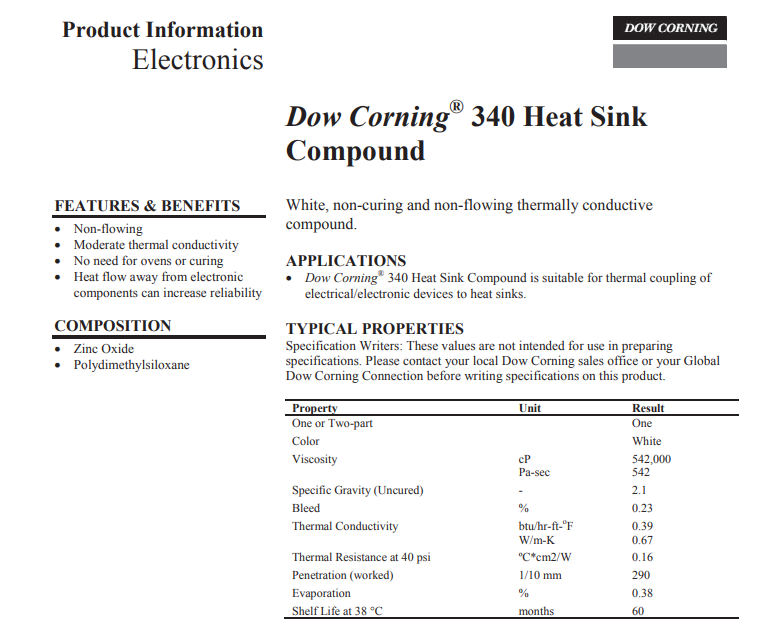

In [78]:
%TIM interface 
th_TIM=0.2e-3;
k_TIM=0.67; %[W/m/K] Dow Corning 340

In [79]:
Rth_TIM=k_TIM*th_TIM/A_module;

In [80]:
RthJCM
Rth_TIM
Rth_MF
RJF=sum([RthJCM, Rth_TIM, Rth_MF])

RthJCM =    75.0000e-003
Rth_TIM =    20.3895e-003
Rth_MF =    11.4071e-003
RJF =   106.7967e-003
